In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [3]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dropna(inplace = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df1 = df[df['Class'] == 1]
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
df0 = df[df['Class'] == 0].sample(n=5000, random_state=1)
df0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267894,162972.0,1.476735,-2.302877,-1.495448,-2.246167,-0.884414,0.272425,-0.459513,-0.070857,0.595159,...,-0.354855,-1.178694,0.031206,-0.211795,-0.524362,-0.596316,-0.015454,0.021358,377.44,0
85086,60597.0,-1.013250,0.957703,0.966383,-0.327025,1.062419,-1.443317,0.883609,0.035041,-0.668089,...,0.108052,0.070092,-0.249798,0.355882,0.264550,-0.688124,0.066271,0.144225,1.00,0
142419,84707.0,-0.721914,-3.652488,-0.117764,0.806532,-1.872401,0.912061,0.349216,0.189207,1.062080,...,0.394110,-0.871374,-0.779140,-0.209955,-0.325284,0.876227,-0.213458,0.162988,976.18,0
33176,37119.0,-0.894129,-0.035284,1.654514,-2.556062,-1.459594,-0.574445,-0.883558,0.545331,-2.063459,...,-0.069115,0.039091,-0.293757,-0.178418,0.455180,-0.131094,0.178112,0.053474,6.00,0


In [7]:
!pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 31.9 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.5.2 requires rich~=11.1, but you have rich 12.1.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.


# Data synthesis using CTGAN

In [9]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(df1,['Class'])
samples = ctgan.sample(500)

/opt/conda/lib/python3.7/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/opt/conda/lib/python3.7/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/opt/conda/lib/python3.7/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [10]:
samples

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,69671.871856,-2.936660,3.697698,-31.818978,1.037076,-1.844737,-1.347354,-21.649105,-24.781138,-5.310428,...,1.258027,-0.453196,-4.412758,-0.999419,0.925351,0.944568,1.133397,0.167538,391.006026,1
1,80400.544142,1.279594,22.197243,-20.861897,2.977998,-3.178538,-4.371584,1.171738,0.078851,-7.463760,...,11.316966,3.400794,2.126771,-0.221450,0.968597,0.800682,-1.461608,0.216775,12.901172,1
2,16725.672729,-25.803135,8.581966,-5.737949,4.336702,-3.068886,1.903512,-5.486102,1.210403,1.540129,...,1.340693,-0.891574,2.659627,0.393288,1.215608,0.048394,-0.038447,0.849085,478.341800,1
3,74081.632102,-10.632606,14.797485,-10.466707,-1.841288,6.987085,0.002719,5.020819,3.467782,0.040038,...,-1.657348,6.164660,-0.238380,-1.144109,-0.657112,-0.036766,-0.574872,0.574464,-60.518521,1
4,110493.823721,-7.340115,4.694993,-15.811021,2.646807,-5.014079,-4.730232,-7.152418,10.997572,-1.425754,...,-16.110173,-11.062368,-1.599967,-0.167661,0.489273,0.193384,0.976162,1.149576,-416.245693,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,155512.612296,-4.081876,0.183153,-10.138228,2.144006,4.583904,-2.983282,11.085193,0.706301,2.753303,...,1.761996,-1.164226,-0.042565,-0.702683,1.779807,1.792509,2.268691,0.927286,128.443659,1
496,65491.307271,0.431350,2.680941,-5.557816,7.645724,0.752038,-2.114360,4.052782,-10.404089,-0.714905,...,1.234433,1.967076,-0.160371,0.783501,-0.601787,0.301823,0.806878,0.476852,46.071514,1
497,-571.641312,-4.460172,24.608225,-4.452383,1.401310,-22.769605,-2.426459,1.905622,1.721002,-5.306761,...,-14.177590,2.733725,1.363352,-0.056892,0.076460,0.082569,0.607135,2.018044,102.886896,1
498,49128.568646,-0.417240,5.063187,-8.202534,0.693579,-3.912067,-0.618588,-2.114340,1.586867,-2.499318,...,2.019696,0.406634,-0.078593,-0.252030,-0.903622,0.999852,0.448544,0.014374,172.247621,1


In [11]:
df1 = pd.concat([df1,samples])
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.000000,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,472.000000,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.000000,1
4920,4462.000000,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.930000,1
6108,6986.000000,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.000000,1
6329,7519.000000,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,155512.612296,-4.081876,0.183153,-10.138228,2.144006,4.583904,-2.983282,11.085193,0.706301,2.753303,...,1.761996,-1.164226,-0.042565,-0.702683,1.779807,1.792509,2.268691,0.927286,128.443659,1
496,65491.307271,0.431350,2.680941,-5.557816,7.645724,0.752038,-2.114360,4.052782,-10.404089,-0.714905,...,1.234433,1.967076,-0.160371,0.783501,-0.601787,0.301823,0.806878,0.476852,46.071514,1
497,-571.641312,-4.460172,24.608225,-4.452383,1.401310,-22.769605,-2.426459,1.905622,1.721002,-5.306761,...,-14.177590,2.733725,1.363352,-0.056892,0.076460,0.082569,0.607135,2.018044,102.886896,1
498,49128.568646,-0.417240,5.063187,-8.202534,0.693579,-3.912067,-0.618588,-2.114340,1.586867,-2.499318,...,2.019696,0.406634,-0.078593,-0.252030,-0.903622,0.999852,0.448544,0.014374,172.247621,1


In [10]:
from sklearn.utils import shuffle
df_new = shuffle(pd.concat([df0,df1]))
df_new.to_csv('new_org_data.csv')

# Data Proprocessing

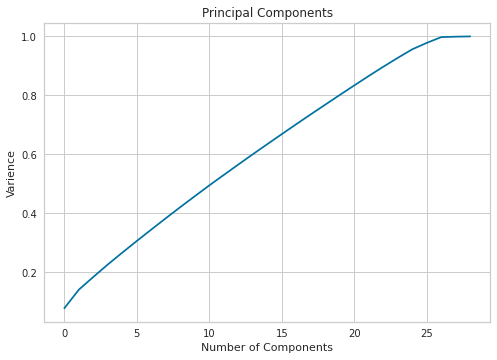

In [12]:
from sklearn.decomposition import PCA

# Standardization
scaling=StandardScaler()

to_drop = ["Class",'Time']
X0 = df0.drop(to_drop, axis=1).to_numpy()
scaling.fit(X0)
Scaled_data=scaling.transform(X0)
 
# Set the n_components=3
pca=PCA()
pca.fit_transform(Scaled_data)
var = pca.explained_variance_ratio_
plt.figure()
# Almost all the data can be extracted by taking 6th principal component
plt.plot(np.cumsum(var))
plt.xlabel("Number of Components")
plt.ylabel("Varience")
plt.title("Principal Components")
plt.show()

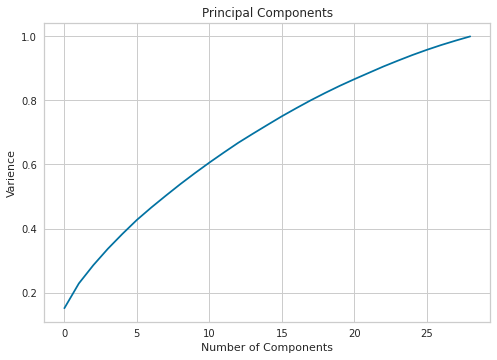

In [13]:
from sklearn.decomposition import PCA

# Standardization
scaling=StandardScaler()

to_drop = ["Class",'Time']
X1 = df1.drop(to_drop, axis=1).to_numpy()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
 
# Set the n_components=3
pca=PCA()
pca.fit_transform(Scaled_data)
var = pca.explained_variance_ratio_
plt.figure()
# Almost all the data can be extracted by taking 6th principal component
plt.plot(np.cumsum(var))
plt.xlabel("Number of Components")
plt.ylabel("Varience")
plt.title("Principal Components")
plt.show()

### TSNE - DBSCAN (Non-Fraud Data Samples)

In [13]:
from sklearn.manifold import TSNE
scaling=StandardScaler()
scaling.fit(X0)
Scaled_data=scaling.transform(X0)
Xtsne = TSNE(n_components=2).fit_transform(Scaled_data)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(1.9,5.0,0.01):
    dbscan_tsne = DBSCAN(eps=i, metric = 'euclidean').fit(Xtsne)
    sh = silhouette_score(Xtsne, dbscan_tsne.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [ ]:
max_index = np.where(sh_arr[:,1] == max(sh_arr[:,1]))
max_sh = sh_arr[max_index,0][0,0]
dbscan_tsne = DBSCAN(eps=max_sh, metric = 'euclidean').fit(Xtsne)
silhouette_score(Xtsne, dbscan_tsne.labels_, metric = 'euclidean')

In [ ]:
import seaborn as sns
dbscan_tsne_data = np.concatenate([Xtsne, dbscan_tsne.labels_.reshape(len( dbscan_tsne.labels_),1)],axis=1)
dbscan_tsne_data = pd.DataFrame(data = dbscan_tsne_data,columns = ['X','Y','Lables'])
_= sns.scatterplot(data=dbscan_tsne_data, x='X', y="Y", hue="Lables")

### UMAP - DBSCAN (Non-Fraud Data Samples)

In [66]:
import umap
scaling=StandardScaler()
scaling.fit(X0)
Scaled_data=scaling.transform(X0)
reducer = umap.UMAP(random_state=0)
Xumap = reducer.fit_transform(Scaled_data)

In [67]:
from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(0.10,0.6,0.01):
    dbscan_umap = DBSCAN(eps=i, metric = 'euclidean').fit(Xumap)
    sh = silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
# _ = plt.plot(sh_arr[:,0],sh_arr[:,1])

Text(0, 0.5, 'Silhouette Score')

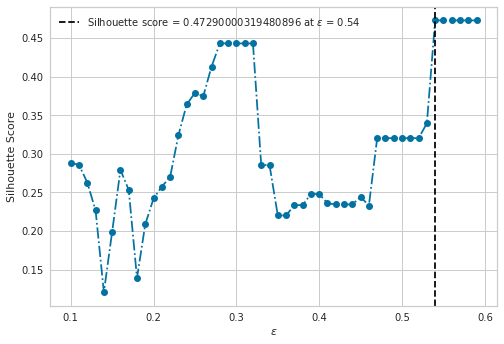

In [68]:
max_index = np.where(sh_arr[:,1] == max(sh_arr[:,1]))
max_sh = round(sh_arr[max_index,0][0,0],2)
max_index = min(max_index[0])
dbscan_umap = DBSCAN(eps=max_sh, metric = 'euclidean').fit(Xumap)
sh_score = round(silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean'),4)
new_sh = sh_score
_ = plt.plot(sh_arr[:,0],sh_arr[:,1],marker = 'o',linestyle = '-.')
plt.axvline(x = max_sh, linestyle="--",color="black",label= 'Silhouette score = {sh} at $\epsilon$ = {eps}'.format(sh = new_sh, eps = max_sh))
plt.grid(True)
plt.legend()
plt.xlabel(r'$\epsilon$')
plt.ylabel('Silhouette Score')

In [69]:
max_index = np.where(sh_arr[:,1] == max(sh_arr[:,1]))
max_sh = sh_arr[max_index,0][0,0]
dbscan_umap = DBSCAN(eps=max_sh, metric = 'euclidean').fit(Xumap)
round(silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean'),4)

0.4729

In [50]:
from sklearn.cluster import DBSCAN
dbscan_umap = DBSCAN(eps=0.6, metric = 'euclidean').fit(Xumap)
silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean')

0.43742403

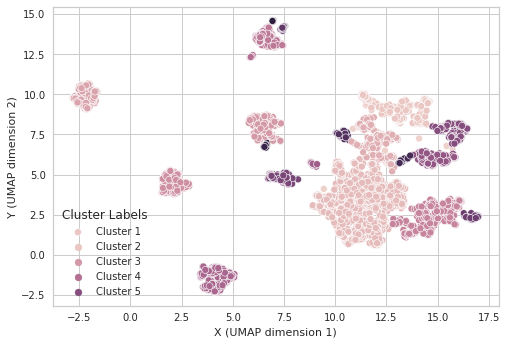

In [62]:
import seaborn as sns
dbscan_umap_data = np.concatenate([Xumap, dbscan_umap.labels_.reshape(len( dbscan_umap.labels_),1)],axis=1)
dbscan_umap_data = pd.DataFrame(data = dbscan_umap_data,columns = ['X','Y','Lables'])
db_scan_plt = sns.scatterplot(data=dbscan_umap_data, x='X', y="Y", hue="Lables")
db_scan_plt.set(xlabel='X (UMAP dimension 1)', ylabel='Y (UMAP dimension 2)')
plt.legend(title='Cluster Labels',labels=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])

### TSNE - DBSACN (Fraud Data Samples)

In [ ]:
from sklearn.manifold import TSNE
scaling=StandardScaler()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
Xtsne1 = TSNE(n_components=2).fit_transform(Scaled_data)

In [ ]:
from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(1.9,5.0,0.01):
    dbscan_tsne1 = DBSCAN(eps=i, metric = 'euclidean').fit(Xtsne1)
    sh = silhouette_score(Xtsne1, dbscan_tsne1.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [ ]:
max_index = np.where(sh_arr[:,1] == max(sh_arr[:,1]))
max_sh = sh_arr[max_index,0][0,0]
dbscan_tsne1 = DBSCAN(eps=max_sh, metric = 'euclidean').fit(Xtsne1)
silhouette_score(Xtsne1, dbscan_tsne1.labels_, metric = 'euclidean')

In [ ]:
import seaborn as sns
dbscan_tsne_data1 = np.concatenate([Xtsne1, dbscan_tsne1.labels_.reshape(len( dbscan_tsne1.labels_),1)],axis=1)
dbscan_tsne_data1 = pd.DataFrame(data = dbscan_tsne_data1,columns = ['X','Y','Lables'])
_= sns.scatterplot(data=dbscan_tsne_data1, x='X', y="Y", hue="Lables")

### UMAP - DBSCAN (Fraud Data Samples)

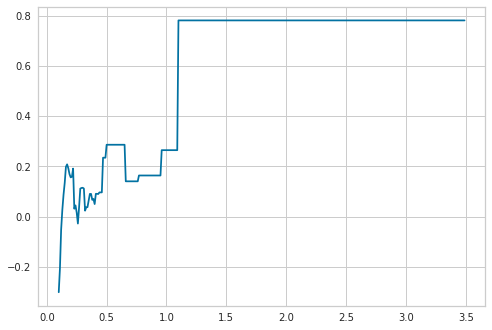

In [18]:
import umap
scaling=StandardScaler()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
reducer = umap.UMAP()
Xumap1 = reducer.fit_transform(Scaled_data)

from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(0.10,3.5,0.01):
    dbscan_umap1 = DBSCAN(eps=i, metric = 'euclidean').fit(Xumap1)
    sh = silhouette_score(Xumap1, dbscan_umap1.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [19]:
from sklearn.cluster import DBSCAN
dbscan_umap1 = DBSCAN(eps=3.4, metric = 'euclidean').fit(Xumap1)
silhouette_score(Xumap1, dbscan_umap1.labels_, metric = 'euclidean')

0.7805387

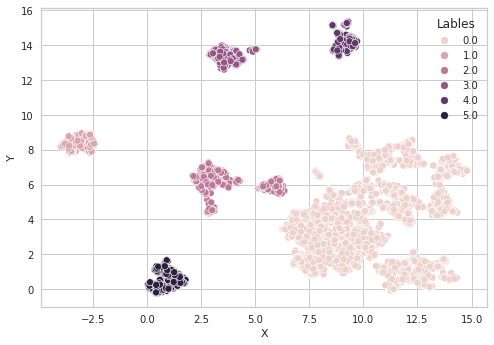

In [20]:
import seaborn as sns
dbscan_umap_data1 = np.concatenate([Xumap1, dbscan_umap1.labels_.reshape(len( dbscan_umap1.labels_),1)],axis=1)
dbscan_umap_data1 = pd.DataFrame(data = dbscan_umap_data1,columns = ['X','Y','Lables'])
_= sns.scatterplot(data=dbscan_umap_data, x='X', y="Y", hue="Lables")

### Final Dataset Generation

In [21]:
new_data0 = pd.DataFrame(columns = ['X','Y','Lables'])

for lable in np.unique(dbscan_umap_data['Lables']):
    clust = dbscan_umap_data[dbscan_umap_data['Lables']== lable]
    sample = clust.sample(frac=0.4,random_state=1)
    new_data0 = new_data0.append(sample)
new_data0

,X,Y,Lables
2672,12.842570,0.962550,0.0
4518,8.651506,1.758916,0.0
2951,12.879457,0.578368,0.0
260,13.697803,5.068135,0.0
411,9.655106,8.157388,0.0
...,...,...,...
4277,0.881359,0.856500,5.0
2004,0.418313,1.174450,5.0
1233,1.205366,0.158397,5.0
449,1.246291,0.988184,5.0


In [22]:
new_data1 = pd.DataFrame(columns = ['X','Y','Lables'])

for lable in np.unique(dbscan_umap_data1['Lables']):
    clust = dbscan_umap_data1[dbscan_umap_data1['Lables']== lable]
    sample = clust.sample(frac=0.4,random_state=1)
    new_data1 = new_data1.append(sample)
new_data1

,X,Y,Lables
952,13.395266,4.388413,0.0
972,12.881321,4.464123,0.0
966,12.829065,4.307051,0.0
872,12.846939,4.554113,0.0
612,13.203028,3.362249,0.0
...,...,...,...
128,1.919690,5.807804,1.0
293,1.390886,6.433517,1.0
111,1.369880,6.249173,1.0
337,3.079957,6.016667,1.0


In [24]:
from sklearn.utils import shuffle
new_data0['Lables'] = np.zeros((1999,1),dtype='int')
new_data1['Lables'] = np.ones((397,1),dtype='int')
new_data = shuffle(pd.concat([new_data0,new_data1],axis = 0))
new_data

,X,Y,Lables
355,10.529109,1.980993,0
1,8.149175,2.604606,0
4295,4.409940,13.249693,0
2694,7.821208,2.684258,0
3047,12.467340,0.417863,0
...,...,...,...
3217,12.154711,7.467433,0
913,13.073758,3.704115,1
3493,1.486877,0.355635,0
3766,8.879507,3.696810,0


In [25]:
new_data.to_csv('new_data.csv')

In [ ]:
# Min - Max Standardization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = new_data.iloc[:,:-1]
Y = new_data['Lables']
X = sc.fit_transform(X)

# Self Organizing Maps (SOM)

In [55]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=2357e1bf1909593cc226f0383ac1711ce5ae5453fb819a30e512d3dc2007c68a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [64]:
from minisom import MiniSom
som_shape = (9, 9)
som = MiniSom(som_shape[0], som_shape[1], 2, sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(X)
som.train(X, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.01814635410874813


In [75]:
np.unique(Y.to_numpy())

array([0, 1])

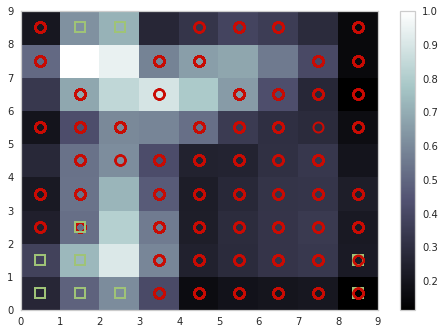

In [96]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y.to_numpy()[i]],
         markeredgecolor = colors[Y.to_numpy()[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [107]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(3,2)]), axis = 0)
# this above line corresponds to the white boxes in our map which shows the value between them i.r MID to be
# 1 which is definately are the customers with the fraud of credit card.
frauds = sc.inverse_transform(frauds)

In [109]:
len(frauds)

79

In [110]:
fraud_list = []
for i in frauds[:,0]:
    for j in range(len(new_data['X'])):
        if i == new_data['X'].to_numpy()[j]:
            fraud_list.append(new_data['Lables'].to_numpy()[j])
len(fraud_list)

35

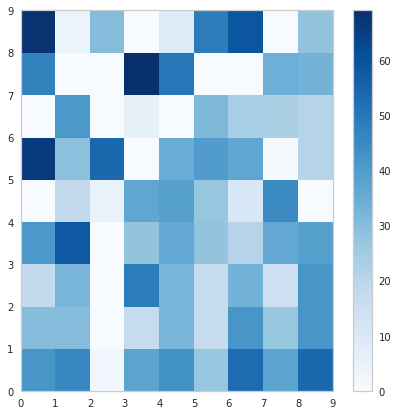

In [79]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()